Import the data set of the store information.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline

# import file 'store.csv'
store_data = pd.read_csv('store.csv')
train_data = pd.read_csv('train.csv')

print display(store_data.head(n=2))
print display(train_data.head(n=2))

/Users/yen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


None


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


None


In [2]:
train_data.info()
print("------------------------------------------")
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                   

In [3]:
merge_data = pd.merge(store_data, train_data, on='Store', how='outer')
print display(merge_data.head(n=2))

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1


None


In [4]:
# use median to replace NaN for numerical column
import re
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

numeric_column_heads = ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Customers',
                        'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek']
numeric_columns = merge_data[numeric_column_heads]
categorical_columns = merge_data.drop(numeric_column_heads, axis=1)

imputer = Imputer(strategy='median')
imputer.fit(numeric_columns)
numeric_columns_X = imputer.transform(numeric_columns)
numeric_columns_tr = pd.DataFrame(numeric_columns_X, columns=numeric_column_heads)

categorical_columns.fillna('NoData', inplace=True)

merge_data = pd.concat([numeric_columns_tr, categorical_columns], axis=1)

Here are the definitions of the terms in the store information file:   
* Store - a unique Id for each store   
* StoreType - differentiates between 4 different store models: a, b, c, d   
* Assortment - describes an assortment level: a = basic, b = extra, c = extended   
* CompetitionDistance - distance in meters to the nearest competitor store   
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened   
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating   
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2   
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the * promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



In [5]:
Promo2 = store_data[store_data['Promo2'] == 1]
Promo2['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

Analysis numbers of StoreType and Assortment: 

In [6]:
storetype = store_data['StoreType'].value_counts()
assortment = store_data['Assortment'].value_counts()
storetype = pd.DataFrame({'storetype':storetype})
assortment = pd.DataFrame({'Assortment':assortment})

print storetype
print assortment

   storetype
a        602
d        348
c        148
b         17
   Assortment
a         593
c         513
b           9


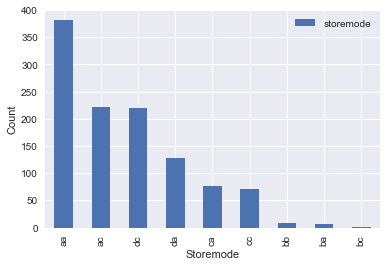

In [7]:
storemode_list = []
for i in range(len(store_data.index)):
    j = store_data['StoreType'].loc[i]
    k = store_data['Assortment'].loc[i]
    storemode_list.append(j + k)
  
storemode = pd.DataFrame(storemode_list, columns=['storemode'])
storemode_count = storemode['storemode'].value_counts()
storemode_count = pd.DataFrame({'storemode':storemode_count})
storemode_count.plot(kind='bar')
plt.xlabel('Storemode')
plt.ylabel('Count')
sns.set()

In [8]:
storemode['Store'] = storemode.index 
merge_data = pd.merge(merge_data, storemode, on='Store', how='outer')
print display(merge_data.head(n=2))

,Store,CompetitionDistance,CompetitionOpenSinceMonth,Customers,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,StoreType,Assortment,Promo2,PromoInterval,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,storemode
0,1.0,1270.0,9.0,555.0,2008.0,22.0,2012.0,5.0,c,a,0.0,NoData,2015-07-31,5263.0,1.0,1.0,0,1.0,aa
1,1.0,1270.0,9.0,546.0,2008.0,22.0,2012.0,4.0,c,a,0.0,NoData,2015-07-30,5020.0,1.0,1.0,0,1.0,aa


None


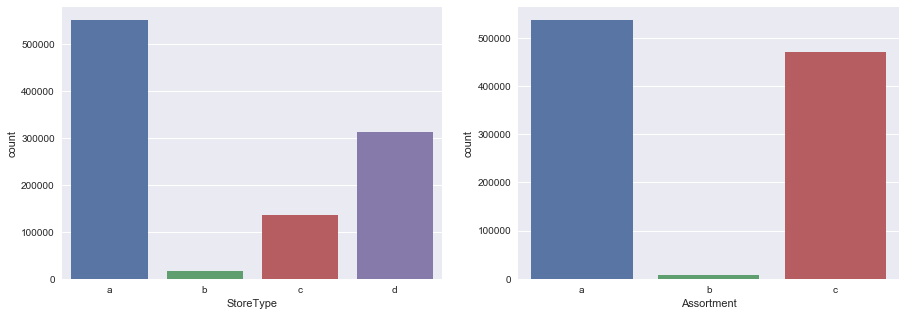

In [9]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='StoreType', data=merge_data, order=['a','b','c','d'], ax=axis1)
sns.countplot(x='Assortment', data=merge_data, order=['a','b','c'], ax=axis2)

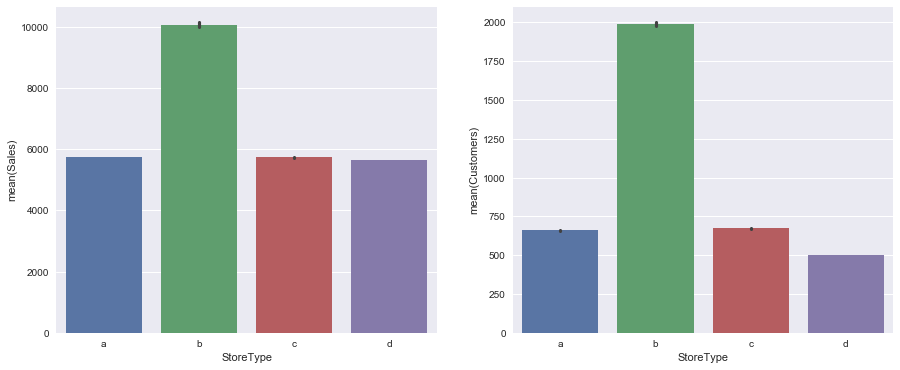

In [10]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='StoreType', y='Sales', data=merge_data, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=merge_data, order=['a','b','c', 'd'], ax=axis2)

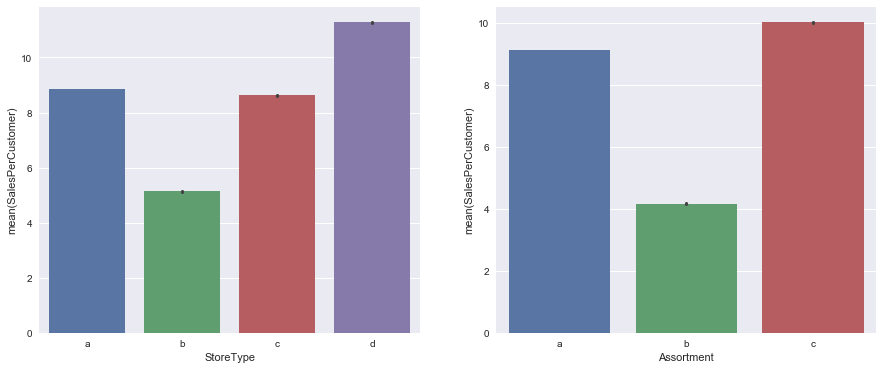

In [11]:
merge_data['SalesPerCustomer'] = merge_data['Sales'] / merge_data['Customers']

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='StoreType', y='SalesPerCustomer', data=merge_data, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='Assortment', y='SalesPerCustomer', data=merge_data, order=['a','b','c'], ax=axis2)

#order=['aa','ac','dc', 'da', 'ca', 'cc', 'bb', 'ba', 'bc']

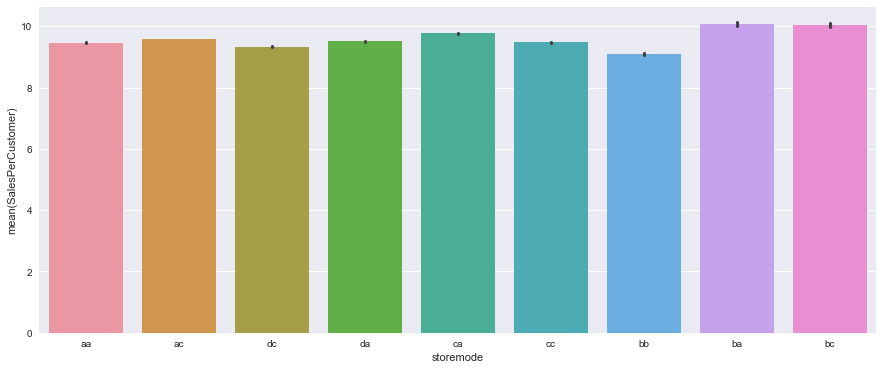

In [12]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,6))
sns.barplot(x='storemode', y='SalesPerCustomer', data=merge_data, order=['aa','ac','dc', 'da', 'ca', 'cc', 'bb', 'ba', 'bc'],ax=axis1)

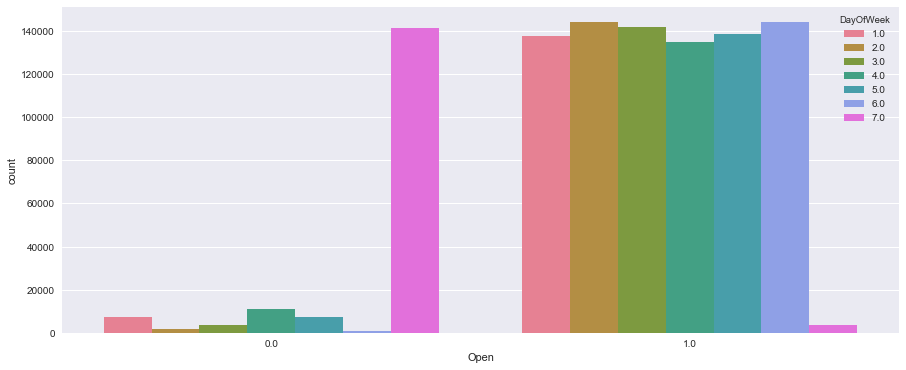

In [13]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x='Open',hue='DayOfWeek', data=merge_data, palette="husl")

To deal with the missing data, I create the functions to fill the missing part for a single column. The first one is use 0 to fill up the missing part, and the second one is use median to fill up the missing part.

/Users/yen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/yen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


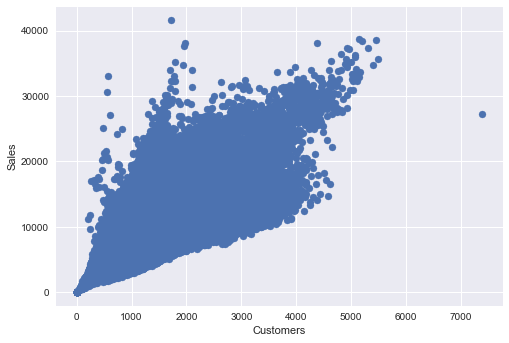

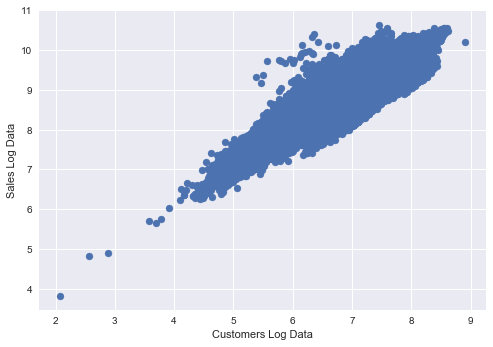

In [14]:
train_data['log_Customers'] = np.log(train_data['Customers'])
train_data['log_Sales'] = np.log(train_data['Sales'])
plt.scatter(train_data['Customers'], train_data['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
sns.set()
plt.show()
plt.scatter(train_data['log_Customers'], train_data['log_Sales'])
plt.xlabel('Customers Log Data')
plt.ylabel('Sales Log Data')
plt.show()

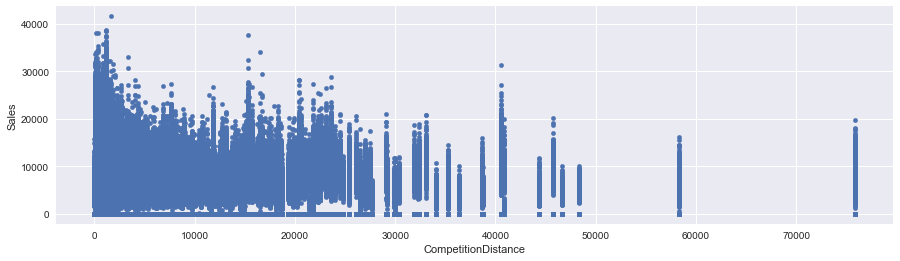

In [15]:
merge_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))

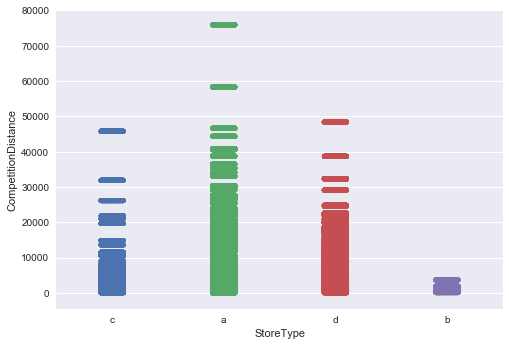

In [16]:
sns.stripplot(x='StoreType', y='CompetitionDistance', data=merge_data, jitter=True)

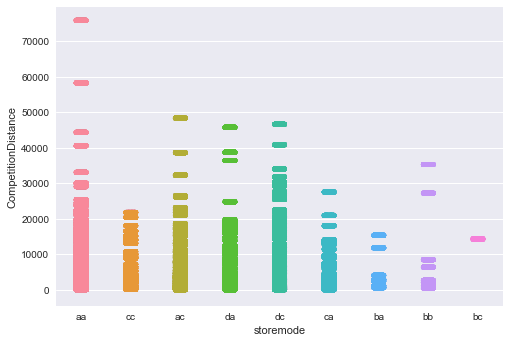

In [17]:
sns.stripplot(x='storemode', y='CompetitionDistance', data=merge_data, jitter=True)

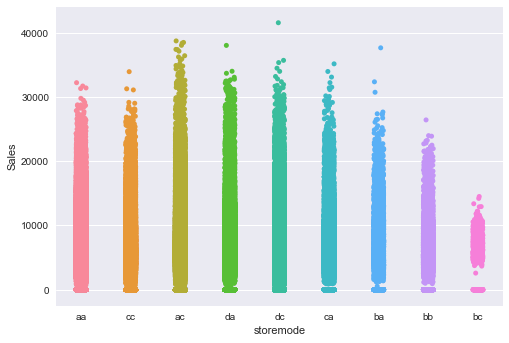

In [18]:
sns.stripplot(x='storemode', y='Sales', data=merge_data, jitter=True)

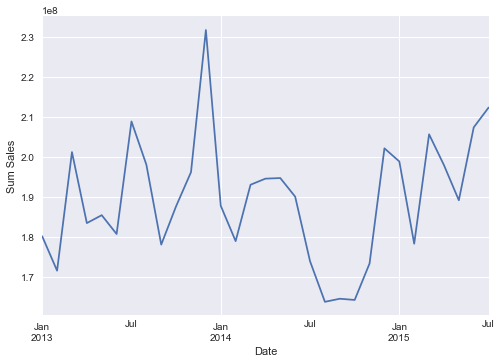

In [19]:
import matplotlib.pyplot as plt
date_sales = pd.concat([train_data['Sales'], train_data['Date']], axis=1)
date_sales['Date'] = pd.to_datetime(date_sales['Date'])
date_sales = date_sales.set_index('Date')
chase_plot = date_sales.resample('M').sum().plot(legend=None)
plt.xlabel('Date')
plt.ylabel('Sum Sales')

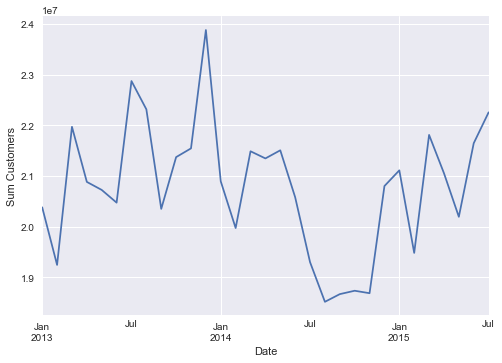

In [20]:
customers_sales = pd.concat([train_data['Customers'], train_data['Date']], axis=1)
customers_sales['Date'] = pd.to_datetime(customers_sales['Date'])
customers_sales = customers_sales.set_index('Date')
chase_plot = customers_sales.resample('M').sum().plot(legend=None)
plt.xlabel('Date')
plt.ylabel('Sum Customers')

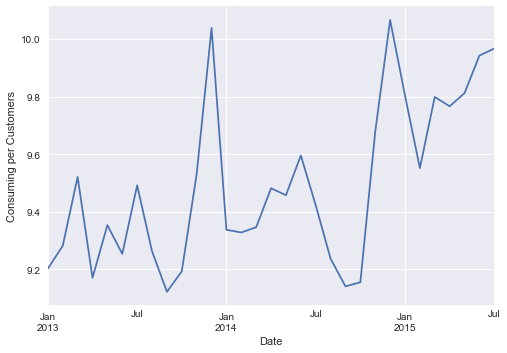

In [21]:
# consuming per customer
consuming = train_data['Sales'] / train_data['Customers']
consuming = pd.DataFrame(consuming, columns=['Consuming'])
consuming = pd.concat([consuming['Consuming'], train_data['Date']], axis=1)
consuming['Date'] = pd.to_datetime(consuming['Date'])
consuming = consuming.set_index('Date')
chase_plot = consuming.resample('M').mean().plot(legend=None)
plt.xlabel('Date')
plt.ylabel('Consuming per Customers')

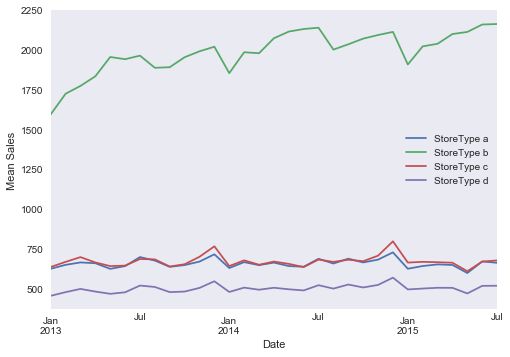

In [22]:
merge_datein = merge_data
merge_datein['Date'] = pd.to_datetime(merge_datein['Date'])
merge_datein = merge_datein.set_index('Date')

store_a = merge_datein[(merge_datein['StoreType'] == 'a')]
store_b = merge_datein[(merge_datein['StoreType'] == 'b')]
store_c = merge_datein[(merge_datein['StoreType'] == 'c')]
store_d = merge_datein[(merge_datein['StoreType'] == 'd')]

store_a = store_a.Customers.resample('M').mean() 
store_b = store_b.Customers.resample('M').mean()
store_c = store_c.Customers.resample('M').mean()
store_d = store_d.Customers.resample('M').mean() 

sns.set_style("dark")
store_a.resample('M').mean().plot(legend=True, label='StoreType a')
store_b.resample('M').mean().plot(legend=True, label='StoreType b')
store_c.resample('M').mean().plot(legend=True, label='StoreType c')
store_d.resample('M').mean().plot(legend=True, label='StoreType d')

plt.xlabel('Date')
plt.ylabel('Mean Sales')

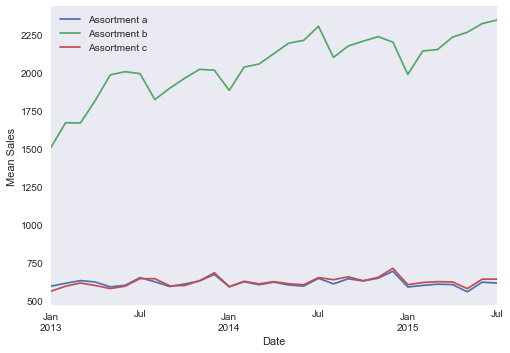

In [23]:
assortment_a = merge_datein[(merge_datein['Assortment'] == 'a')]
assortment_b = merge_datein[(merge_datein['Assortment'] == 'b')]
assortment_c = merge_datein[(merge_datein['Assortment'] == 'c')]

assortment_a = assortment_a.Customers.resample('M').mean() 
assortment_b = assortment_b.Customers.resample('M').mean()
assortment_c = assortment_c.Customers.resample('M').mean()

sns.set_style("dark")
assortment_a.resample('M').mean().plot(legend=True, label='Assortment a')
assortment_b.resample('M').mean().plot(legend=True, label='Assortment b')
assortment_c.resample('M').mean().plot(legend=True, label='Assortment c')

plt.xlabel('Date')
plt.ylabel('Mean Sales')

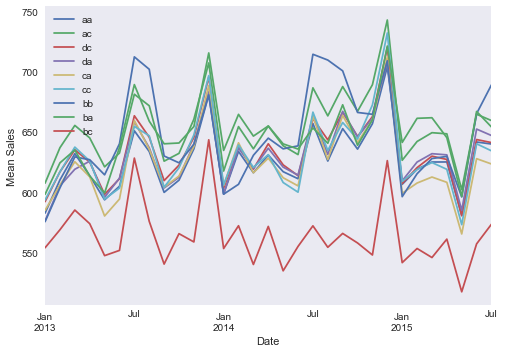

In [24]:
storemode_list_2 = ['aa', 'ac', 'dc', 'da', 'ca', 'cc', 'bb', 'ba', 'bc']  

for i in range(len(storemode_list_2)):
    y = storemode_list_2[i]
    x = merge_datein[(merge_datein['storemode'] == y)]
    x.Customers.resample('M').mean().plot(legend=True, label=y)
plt.xlabel('Date')
plt.ylabel('Mean Sales')

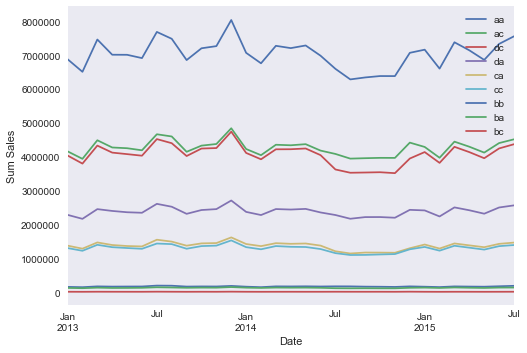

In [25]:
for i in range(len(storemode_list_2)):
    y = storemode_list_2[i]
    x = merge_datein[(merge_datein['storemode'] == y)]
    x.Customers.resample('M').sum().plot(legend=True, label=y)
plt.xlabel('Date')
plt.ylabel('Sum Sales')

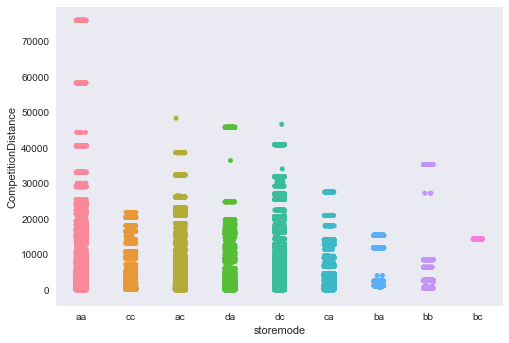

In [26]:
data_sales_1 = merge_data[merge_data['Sales'] >= 10000]
sns.stripplot(x='storemode', y='CompetitionDistance', data=data_sales_1, jitter=True)

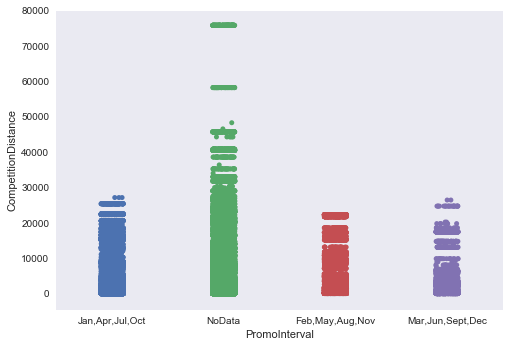

In [27]:
sns.stripplot(x='PromoInterval', y='CompetitionDistance', data=data_sales_1, jitter=True)

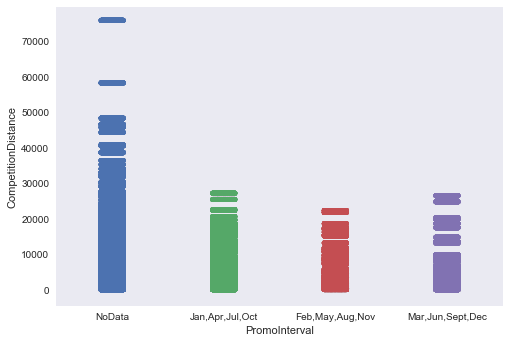

In [28]:
sns.stripplot(x='PromoInterval', y='CompetitionDistance', data=merge_data, jitter=True)

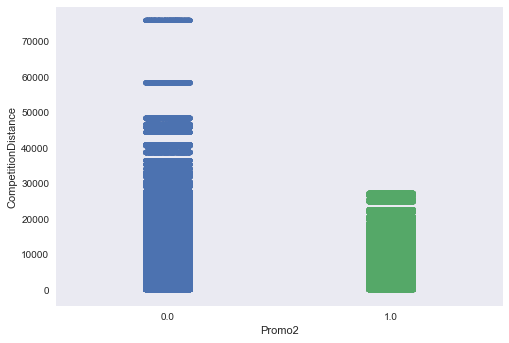

In [29]:
sns.stripplot(x='Promo2', y='CompetitionDistance', data=merge_data, jitter=True)

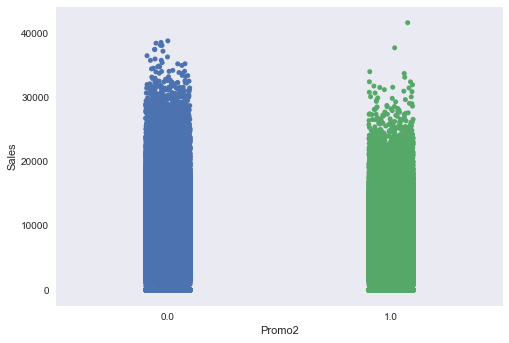

In [30]:
sns.stripplot(x='Promo2', y='Sales', data=merge_data, jitter=True)

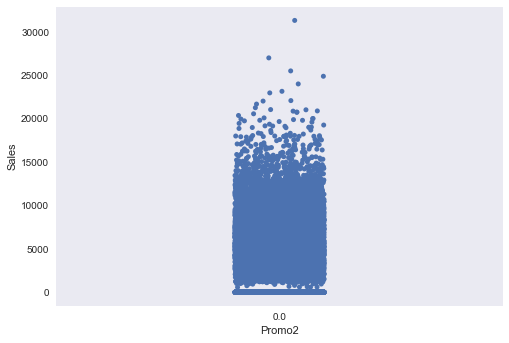

In [31]:
data_CompetitionDistance = merge_data[merge_data['CompetitionDistance'] >= 30000]
sns.stripplot(x='Promo2', y='Sales', data=data_CompetitionDistance, jitter=True)